# Продвинутые темы pandas 
- Ускоряем и оптимизируем панд
- Shape of data, или работа с таблицами
- Управляем временем
- Стильный урок

### Ускоряем и оптимизируем панд

Cпособы итерации по датафреймам и применение операции к каждому элементу.

Определение эффективности вариантов.

**Первый метод — pd.iterrows().**
На каждой итерации возвращает строку датафрейма в виде пар (index, series), где первый элемент является индексом, а содержимое самого ряда представляется в виде Series. Таким образом, можно использовать его в цикле

In [28]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [3]:
df = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-a-eremina/lesson_1/money_by_city.csv')

In [4]:
df.head()

,title,money,number
0,Подписка «ОНЛАЙН ДИЕТОЛОГ» с ежемесячным автос...,366947.20,125
1,Курс обучения «Консультант»,208163.49,31
2,Курс обучения «Специалист»,160862.64,7
3,Курс обучения «Эксперт»,148992.80,5
4,Курс от Школы Диетологов. Повышение квалификац...,88384.92,9


In [5]:
for index, row in df[:1].iterrows():
    print(f"Тип индекса: {type(index)},\nТип содержимого строки: {type(row)}")

Тип индекса: <class 'int'>,
Тип содержимого строки: <class 'pandas.core.series.Series'>


Посмотрим, в каком формате возвращается содержимое строки:

In [6]:
for index, row in df[:2].iterrows():
    print("Индекс: {},\nСодержимое строки:\n{}\n".format(index, row))

Индекс: 0,
Содержимое строки:
title     Подписка «ОНЛАЙН ДИЕТОЛОГ» с ежемесячным автос...
money                                                366947
number                                                  125
Name: 0, dtype: object

Индекс: 1,
Содержимое строки:
title     Курс обучения «Консультант»
money                          208163
number                             31
Name: 1, dtype: object



К конкретным колонкам тоже можно обратиться. Так, выведем индекс и число для первых трех наблюдений:

In [7]:
for index, row in df[:3].iterrows():
    print("Индекс {}; Число: {}".format(index, row['number']))

Индекс 0; Число: 125
Индекс 1; Число: 31
Индекс 2; Число: 7


Этот метод является одним из наименее эффективных. Тем не менее, работает быстрее, чем самые обычные циклы.

**Представьте, что вы аналитик в сервисе такси.** Нужно написать функцию haversine для подсчета расстояния между пунктами отправления и прибытия и, используя  pd.iterrows(), создать колонку distance с подсчитанным расстоянием. 

In [8]:
nyc = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-a-eremina/lesson_8/nyc.csv.zip', compression='zip')

In [9]:
nyc.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


- pickup_datetime — дата начала поездки
- pickup_longitude — долгота исходного местоположения
- pickup_latitude — широта исходного местоположения
- dropoff_longitude — долгота пункта назначения
- dropoff_latitude — широта пункта назначения
- fare_amount — стоимость поездки в долларах 
- passenger_count — число пассажиров

Сама функция haversine() должна принимать на вход 5 параметров, один из которых должен иметь значение по умолчанию.

Чтобы оценить скорость выполнения операции, воспользуйтесь magic-функцией %timeit (или %%time), поместив её в начало ячейки. 
В дальнейшем результаты её выполнения позволят нам сравнить изученные методы и понять, какой из них справляется быстрее.

In [10]:
def haversine(q1, q2, l1, l2, radius=6371):
    q1, q2, l1, l2 = map(np.radians, [q1, q2, l1, l2])
    diff_q = q2 - q1
    diff_l = l2 - l1 
    a = np.sin(diff_q/2)**2 + np.cos(q1) * np.cos(q2) * np.sin(diff_l/2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    d = radius * c 
    return d

In [11]:
# Саму функцию можно применить как используя обычный цикл

# dists = [ ]
# for i, row in df.iterrows():
#     dists.append(haversine(row['...'], ..., ..., ...))
# df['distance'] = dists

In [12]:
# так и используя более компактный вариант:

In [13]:
%%time
nyc['distance'] = pd.Series(haversine(row['dropoff_latitude'], 
                                      row['pickup_latitude'], 
                                      row['dropoff_longitude'], 
                                      row['pickup_longitude']) for i, row in nyc.iterrows())

CPU times: user 5.83 s, sys: 0 ns, total: 5.83 s
Wall time: 5.83 s


In [14]:
nyc.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,1.030764
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,8.450134
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,1.389525
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,2.799270
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,1.999157


Еще один метод **pd.itertuples** на каждой итерации возвращает именованный кортеж (named tuple) для каждой строки датафрейма. 
Параметр index по умолчанию равен True, поэтому первым элементом кортежа следует индекс, далее — содержимое строки. 

Обратите внимание, что, в отличие от первого метода, строка возвращается уже не как Series:

In [15]:
for row in nyc[:1].itertuples(name='ride'):  # исп. "ride" как название кортежей
    print(f"Тип содержимого: {type(row)}")

Тип содержимого: <class 'pandas.core.frame.ride'>


In [16]:
for row in nyc[:3].itertuples(name='custom_name'):
    print(row)

custom_name(Index=0, key='2009-06-15 17:26:21.0000001', fare_amount=4.5, pickup_datetime='2009-06-15 17:26:21 UTC', pickup_longitude=-73.844311, pickup_latitude=40.721319, dropoff_longitude=-73.84161, dropoff_latitude=40.71227800000001, passenger_count=1, distance=1.0307639350481281)
custom_name(Index=1, key='2010-01-05 16:52:16.0000002', fare_amount=16.9, pickup_datetime='2010-01-05 16:52:16 UTC', pickup_longitude=-74.016048, pickup_latitude=40.711303, dropoff_longitude=-73.979268, dropoff_latitude=40.782004, passenger_count=1, distance=8.450133595805992)
custom_name(Index=2, key='2011-08-18 00:35:00.00000049', fare_amount=5.7, pickup_datetime='2011-08-18 00:35:00 UTC', pickup_longitude=-73.982738, pickup_latitude=40.76127, dropoff_longitude=-73.991242, dropoff_latitude=40.750562, passenger_count=2, distance=1.3895252257697308)


Индекс и число пассажиров для первых трех наблюдений:

In [17]:
for row in nyc[:3].itertuples():
    print("Индекс {}; Число пассажиров: {}".format(row.Index, row.passenger_count))

Индекс 0; Число пассажиров: 1
Индекс 1; Число пассажиров: 1
Индекс 2; Число пассажиров: 2


Проделайте ту же операцию, что и в предыдущем шаге, но уже используя pd.itertuples(), а затем сравните время выполнения.

In [18]:
%%time
nyc['distance'] = pd.Series(haversine(row.dropoff_latitude, 
                                      row.pickup_latitude, 
                                      row.dropoff_longitude, 
                                      row.pickup_longitude) for row in nyc.itertuples())

CPU times: user 907 ms, sys: 0 ns, total: 907 ms
Wall time: 907 ms


In [19]:
for row in nyc[:3].itertuples(name='custom_name'):
    print(row)

custom_name(Index=0, key='2009-06-15 17:26:21.0000001', fare_amount=4.5, pickup_datetime='2009-06-15 17:26:21 UTC', pickup_longitude=-73.844311, pickup_latitude=40.721319, dropoff_longitude=-73.84161, dropoff_latitude=40.71227800000001, passenger_count=1, distance=1.0307639350481281)
custom_name(Index=1, key='2010-01-05 16:52:16.0000002', fare_amount=16.9, pickup_datetime='2010-01-05 16:52:16 UTC', pickup_longitude=-74.016048, pickup_latitude=40.711303, dropoff_longitude=-73.979268, dropoff_latitude=40.782004, passenger_count=1, distance=8.450133595805992)
custom_name(Index=2, key='2011-08-18 00:35:00.00000049', fare_amount=5.7, pickup_datetime='2011-08-18 00:35:00 UTC', pickup_longitude=-73.982738, pickup_latitude=40.76127, dropoff_longitude=-73.991242, dropoff_latitude=40.750562, passenger_count=2, distance=1.3895252257697308)


Метод **pd.apply()** применяет заданную функцию вдоль определенной оси (axis=0 – строки; axis=1 – столбцы) и является более эффективным способом, чем pd.iterrows() за счет использования внутренних оптимизаций в pandas. 
Тем не менее, все равно подразумевает итерацию по всем рядам.

In [20]:
# df['distance'] = df[['col1', 'col2', 'col3', 'col4']].apply(lambda row: haversine(row[0], row[1], row[2], row[3]), axis=1)

In [21]:
# более медленный вариант
# df['distance'] = df.apply(lambda x: haversine(x['col1'], x['col2'], x['col3'], x['col4']), axis=1)

В столбец distance датафрейма nyc сохраните результат подсчета расстояния между точками отправки и прибытия, 
используя написанную ранее функцию. В переменную longest сохраните самое большое расстояние

In [22]:
%%time
nyc['distance'] = (nyc[['dropoff_latitude', 'pickup_latitude', 'dropoff_longitude', 'pickup_longitude']]
                  .apply(lambda row: haversine(row[0], row[1], row[2], row[3]), axis=1)
                  )
# более медленный вариант
# nyc['distance'] = nyc.apply(lambda x: haversine(x['dropoff_latitude'], x['pickup_latitude'], x['dropoff_longitude'], x['pickup_longitude']), axis=1)

CPU times: user 1.78 s, sys: 0 ns, total: 1.78 s
Wall time: 1.78 s


In [23]:
longest = nyc.distance.max()
longest

8667.818812217458

В целом, itertuples — это именно то, что нам нужно! Но есть пара моментов.

Оказывается, в нашем случае itertuples — не предел. На всех предыдущих шагах мы использовали циклы, что не очень хорошо. 

Базовые объекты в pandas — Series и DataFrame, которые представляют собой одномерные и двумерные массивы (arrays). Так, векторизация — процесс выполнения операций над массивами. В pandas есть большой набор векторизованных функций, и их использование во многих случаях предпочтительнее обычных циклов, поскольку они предназначены для работы именно с Series. 
К таким функциям относятся, например, sum и agg.  

С помощью векторизации можно получить ещё большее ускорение, значительно уменьшив количество итераций. Иными словами, действия будут происходят сразу над всей серией, а не над каждым элементом по отдельности.

Изменения в коде весьма незначительны: передаем функции на вход необходимые колонки, и получается магия!

In [24]:
# df['distance'] = haversine(df['col1'], df['col2'], df['col3'], df['col4'])

In [25]:
%%time
nyc['distance'] = haversine(nyc['dropoff_latitude'], nyc['pickup_latitude'], nyc['dropoff_longitude'], nyc['pickup_longitude'])

CPU times: user 25.9 ms, sys: 10 µs, total: 25.9 ms
Wall time: 24.1 ms


В предыдущем шаге мы передавали функции колонки формата Series, с чем связаны дополнительные вычислительные затраты, например, индексирование и проверка типа данных. 

Чтобы этого избежать, в качестве аргументов функции можно передать всё те же необходимые колонки, дополнительно указав .values, чтобы из Series получить массив NumPy (numpy array). 

В таком случае действия будут выполняться непосредственно над ndarrays. Такой способ можно использовать, когда отсутствие индексов и пр. не приведет к нарушению работы применяемой функции. 

In [26]:
%%time
nyc['distance'] = haversine(nyc['dropoff_latitude'].values, nyc['pickup_latitude'].values, nyc['dropoff_longitude'].values, nyc['pickup_longitude'].values)

CPU times: user 18.1 ms, sys: 76 µs, total: 18.2 ms
Wall time: 21.4 ms


Давайте подробнее посмотрим на информацию о самой длинной поездке в датасете nyc с 50 000 наблюдений. Как вы уже заметили, произошло что-то странное: в качестве широты и долготы стоят нулевые значения, а расстояние — целых 8667 км! Неужели наш пассажир действительно уехал так далеко 

Посмотрите, есть ли еще кейсы, где в качестве хотя бы одной из координат пункта назначения стоят нули, и в качестве ответа укажите количество таких случаев.

In [27]:
nyc.query('dropoff_longitude == 0 or dropoff_latitude == 0').shape[0]

958

Постройте графики распределения переменных pickup_latitude, pickup_longitude, dropoff_latitude, dropoff_longitude, и для каждой переменной выберите только один наиболее подходящий вариант для дальнейшей фильтрации данных 

/opt/tljh/user/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/tljh/user/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/tljh/user/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/tljh/user/lib/python3.7/site-

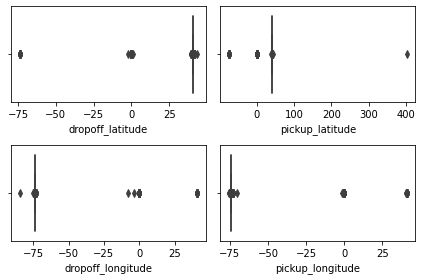

In [29]:
fig, axes = plt.subplots(ncols = 2, nrows = 2)

sns.boxplot(nyc.dropoff_latitude, ax = axes.flatten()[0])
sns.boxplot(nyc.pickup_latitude, ax = axes.flatten()[1])
sns.boxplot(nyc.dropoff_longitude, ax = axes.flatten()[2])
sns.boxplot(nyc.pickup_longitude, ax = axes.flatten()[3])
plt.tight_layout()

Критерии для фильтрации выбраны, остался последний шаг: отфильтровать имеющиеся данные и наконец-то найти самую дальнюю поездку.

Для фильтрации используйте условия из предыдущего степа, а также добавьте еще одно ограничение для переменной distance. 
Предположим, максимальная удаленность пунктов друг от друга не должна превышать 50 км, иначе такой заказ не будет принят системой, а наличие подобных результатов в таблице будет считаться ошибкой.

В качестве ответа укажите сумму, которую заплатил пассажир, проехавший наибольшее расстояние.

In [30]:
# первый вариант
nyc_filtered = nyc.query('(10 < pickup_latitude < 120) and (pickup_longitude < -60) and (10 < dropoff_latitude) and (dropoff_longitude < -60) and (distance <= 50)') \
                  .sort_values('distance', ascending=False)
longest = nyc_filtered.distance.idxmax()
nyc_filtered.loc[longest].fare_amount

136.0

In [31]:
# второй вариант, предпочтительнее, т.к. несколько пассажиров могли проехать одинаковое расстояние, 
# idxmax вернул бы только 1 индекс
nyc_filtered.query('distance == @nyc_filtered.distance.max()').fare_amount

33502    136.0
Name: fare_amount, dtype: float64

### Shape of data, или работа с таблицами

Начнем с методов stack и unstack, которые очень похожи на pivot(), и предназначены для работы с MultiIndex

**Stack** — помещает уровень столбцов в уровни индекса строк. Результирующий объект – Series.Например, создадим датафрейм из трех колонок:

In [32]:
np.random.seed(17)
df = pd.DataFrame({'col_1':['item_1', 'item_2', 'item_3', 'item_4', 'item_5'], 
                   'col_2': np.random.randint(0, 10, 5), 
                   'col_3': np.random.randint(0, 10, 5)})
df

,col_1,col_2,col_3
0,item_1,1,6
1,item_2,6,4
2,item_3,6,7
3,item_4,9,4
4,item_5,0,7


Применяем .stack():

In [33]:
df_stacked = df.stack()
df_stacked

0  col_1    item_1
   col_2         1
   col_3         6
1  col_1    item_2
   col_2         6
   col_3         4
2  col_1    item_3
   col_2         6
   col_3         7
3  col_1    item_4
   col_2         9
   col_3         4
4  col_1    item_5
   col_2         0
   col_3         7
dtype: object

Индексам также можно присвоить названия:

In [34]:
df_stacked.index.names = ['id', 'column']
df_stacked

id  column
0   col_1     item_1
    col_2          1
    col_3          6
1   col_1     item_2
    col_2          6
    col_3          4
2   col_1     item_3
    col_2          6
    col_3          7
3   col_1     item_4
    col_2          9
    col_3          4
4   col_1     item_5
    col_2          0
    col_3          7
dtype: object

В качестве аргументов stack можно передать два параметра.
- level – отвечает за уровень, по которому будет проведена стыковка
- dropna – нужно ли убрать ряды с пропущенными значениями 

Значения конкретного уровня индексов можно получить используя метод .xs(), передав ему интересующее нас значение индекса и уровень. 

Например, чтобы вывести все значения для height, в аргументах нужно указать само значение и название столбца с индексами интересующего нас уровня, в данном случае — param.

In [35]:
# df_stacked_2 = df.stack([0,1])
# df_stacked_2.index.names = ['name', 'param', 'param_type']  # присваиваем индексам названия
# df_stacked_2

In [36]:
# name    param    param_type
# Persik  height   new_cm      26.0
#         weight   new_kg       3.4
# Barsik  height   new_cm      30.0
#                  old_cm      25.0
#         weight   new_kg       4.1
#                  old_kg       3.0
# dtype: float64

In [37]:
# Достаем все значения роста height из уровня индексов param с помощью xs: 
# df_stacked_2.xs('height', level='param')

# name    param_type
# Persik  new_cm        26.0
# Barsik  new_cm        30.0
#         old_cm        25.0
# dtype: float64

Попробуем достать значения из колонок исходного датафрейма. Для этого необходимо указать axis=1, далее – уровень и ключ, т.е. название интересующего нас уровня. 

In [38]:
#                 weight          height    # level 0
#         old_kg  new_kg  old_cm  new_cm    # level 1
# Persik     NaN     3.4     NaN    26.0
# Barsik     3.0     4.1    25.0    30.0

In [39]:
# df.xs(axis=1, level=1, key='old_kg')

#         weight
# Persik     NaN
# Barsik     3.0

In [40]:
# Старый и новый:
# df.xs(axis=1, key='weight')  # в данном случае можно не указывать level, т.к. по умолчанию level=0

#         old_kg  new_kg
# Persik     NaN     3.4
# Barsik     3.0     4.1

In [41]:
# Note: Чтобы получить значения из исходного датафрейма, можно также передать кортеж из уровней:

# df[('weight', 'old_kg')]

# Persik    NaN
# Barsik    3.0
# Name: (weight, old_kg), dtype: float64

Переименование индексов

In [47]:
# df.index.set_names(['fisrt', 'second'], inplace=True)
# или
# df.index.names = ['1st', '2nd']

**Unstack (расстыковка)** — операция, противоположная stack, которая помещает уровень индекса строк в уровень оси столбцов.

In [48]:
# df_stacked_2

# name    param    param_type
# Persik  height   new_cm      26.0
#         weight   new_kg       3.4
# Barsik  height   new_cm      30.0
#                  old_cm      25.0
#         weight   new_kg       4.1
#                  old_kg       3.0
# dtype: float64

In [49]:
# df_stacked_2.unstack(level=1)

In [50]:
#         param      height   weight
# name    param_type
# Persik      new_cm   26.0      NaN
#             new_kg    NaN      3.4
# Barsik      new_cm   30.0      NaN
#             new_kg    NaN      4.1
#             old_cm   25.0      NaN
#             old_kg    NaN      3.0


Один из аргументов метода — level, отвечает за уровень, по которому будет проведена расстыковка. Можно передать как число, так и название уровня индексов, если таковое имеется. 
В данном случае, 0 или "name", 1 или "param", 2 или "param_type".

In [51]:
# df_stacked_2.unstack(level='name')

#         name        Persik   Barsik
# param   param_type
# height	new_cm        26.0     30.0
#         old_cm         NaN     25.0
# weight  new_kg         3.4      4.1
#         old_kg         NaN      3.0

In [52]:
# Для того, чтобы сделать расстыковку по нескольким уровням, необходимо передать список, состоящий либо только из чисел, 
# либо только из названий. 
# Поместим параметры в столбцы, а имена оставим в индексах:
    
# df_stacked_2.unstack(level=['param', 'param_type'])

# param       height  weight  height  weight
# param_type  new_cm  new_kg  old_cm  old_kg
#       name				
#     Persik    26.0     3.4     NaN     NaN
#     Barsik    30.0     4.1    25.0     3.0


In [53]:
pokemon = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-a-eremina/lesson_8/Pokemon.csv')

In [54]:
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


Сначала измените названия исходных столбцов:

- пробелы и точки нужно заменить на "_" (напр. Sp. Atk → sp_atk).
- приведите все названия к нижнему регистру
- колонку "#" переименовать в "id"

In [55]:
pokemon.columns = pokemon.columns.str.replace(' ', '_')
pokemon.columns = pokemon.columns.str.lower()
pokemon.columns = pokemon.columns.str.replace('.', '')
pokemon = pokemon.rename(columns={'#':'id'})

In [56]:
# Другой способ:
# pokemon = (pokemon
#           .rename(columns={'#':'id'})
#           .rename(columns=lambda x: x.replace(' ', '_').replace('.','').lower())
#           )

In [57]:
pokemon.head()

,id,name,type_1,type_2,total,hp,attack,defense,sp_atk,sp_def,speed,generation,legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


Сгруппируйте данные по поколению покемонов (generation), и с помощью value_counts() посчитайте, сколько в каком поколении легендарных покемонов (legendary), а также сколько в этих поколениях нелегендарных покемонов. 

Полученный объект приведите к формату датафрейма (.to_frame()) и сохраните в legends.

In [58]:
legends = (pokemon
          .groupby(['generation'])
          .legendary
          .value_counts()
          .to_frame()
          )

In [59]:
legends

legendary
generation legendary           
1          False            160
           True               6
2          False            101
           True               5
3          False            142
           True              18
4          False            108
           True              13
5          False            150
           True              15
6          False             74
           True               8

Используйте датафрейм legends, полученный на предыдущем шаге, и измените в нём название столбца, перезаписав его в ту же переменную. 

Затем используйте unstack, чтобы поместить уровень индекса legendary в уровень оси столбцов. 
Иными словами, должно получиться две колонки – False & True. Результат сохраните в legends_unstacked.

In [60]:
legends = legends.rename(columns={'legendary' : 'legendary_count'})

In [61]:
legends_unstacked = legends.unstack('legendary')

In [62]:
legends_unstacked

legendary_count      
legendary            False True 
generation                      
1                      160     6
2                      101     5
3                      142    18
4                      108    13
5                      150    15
6                       74     8

Сгруппируйте датасет pokemon по переменным generation и type_1, посчитайте количество легендарных покемонов внутри групп. 
Приведите данные в формат датафрейма, а затем используйте unstack(). 

В качестве ответа выберите вид и поколение покемона, среди которых больше всего легендарных.

Hint: обратиться к колонке с мультииндексом можно с помощью .loc[:,('legendary', True)]

In [63]:
pokemon.groupby(['generation','type_1']) \
          .legendary \
          .value_counts() \
          .to_frame() \
          .unstack()

legendary      
legendary               False True 
generation type_1                  
1          Bug           14.0   NaN
           Dragon         3.0   NaN
           Electric       8.0   1.0
           Fairy          2.0   NaN
           Fighting       7.0   NaN
...                       ...   ...
6          Poison         2.0   NaN
           Psychic        3.0   2.0
           Rock           7.0   2.0
           Steel          5.0   NaN
           Water          5.0   NaN

[98 rows x 2 columns]

In [64]:
legends_type_1 = (pokemon
          .groupby(['generation','type_1'])
          .legendary
          .value_counts()
          .to_frame()
          .unstack()
          .loc[:,('legendary', True)]
          .idxmax()
          )

In [65]:
legends_type_1

(3, 'Dragon')

### Широкий и длинный формат

С помощью метода **melt** можно "расплавить" данные и привести их к длинному формату. 
Одна / несколько колонок помещаются в качестве идентификационных переменных, а остальные столбцы считаются измеряемыми переменными. 
Их названия и значения помещаются в колонки variable и value.

Для изменения названий полученных столбцов используются параметры var_name и value_name.

In [66]:
df3 = pd.DataFrame({'name': ['Persik', 'Brownie'], 'type': ['cat', 'dog'],
                    'color': ['ginger', 'white'], 'height': [17, 30], 
                    'weight': [3.4, 4.3]})
df3

,name,type,color,height,weight
0,Persik,cat,ginger,17,3.4
1,Brownie,dog,white,30,4.3


Расплавляем! 

Если не указать колонки, которые нужно использовать в качестве идентификаторов, то названия всех столбцов помещаются в variable,а соответствующие в value.

In [67]:
df3.melt().head()

,variable,value
0,name,Persik
1,name,Brownie
2,type,cat
3,type,dog
4,color,ginger


Используем имена в качестве идентификатора:

In [68]:
df3.melt(id_vars='name').head()

,name,variable,value
0,Persik,type,cat
1,Brownie,type,dog
2,Persik,color,ginger
3,Brownie,color,white
4,Persik,height,17


Для изменения названий полученных столбцов используются параметры var_name и value_name. 

Передаем в качестве id_vars имена, для значений (value_vars) используем только три колонки и изменяем названия новых колонок:

In [69]:
df3.melt(id_vars=['name'], value_vars=['type', 'color', 'height'], 
         var_name='characteristics', value_name='value')

,name,characteristics,value
0,Persik,type,cat
1,Brownie,type,dog
2,Persik,color,ginger
3,Brownie,color,white
4,Persik,height,17
5,Brownie,height,30


Еще один вариант для перевода данных из широкого формата в длинный — **pd.wide_to_long().** (ЕСЛИ ЕСТЬ ДОП ИНФОРМАЦИЯ В НАЗВАНИЯХ КОЛОНОК)

Предположим, мы собрали побольше данных о котике Персике и пёсике Брауни, и добавили данные о весе и росте уже за два года:

In [70]:
#      name type  AvgHeight_2019  AvgHeight_2020  AvgWeight_2019  AvgWeight_2020   color 
# 0   Persik  cat       17.077963       17.134233             3.4          3.5545  ginger
# 1  Brownie  dog       30.673324       30.674466             4.3          4.5716   white    

Посмотрим на аргументы функции более подробно.

- data — датафрейм
- stubnames — части названий переменных, которые мы хотим преобразовать из широкого формата в длинный
- i — переменные, которые не трансформируются, и в результате помещаются в индексы
- j — имя новой переменной
- sep — разделитель (между параметром и значением)

В данном случае у нас есть две общих характеристики, отвечающих за рост и вес в конкретный год. Названия соответствующих переменных состоят из AvgHeight / AvgWeight и года, поэтому в stubnames мы передаем список параметров (вес и рост), а оставшаяся часть названия (2018, 2019) будет использована в качестве значений новой переменной year. 

Столбцы type и name помещаем в индексы, а параметр color оставляем обычной колонкой.

In [71]:
# lng = pd.wide_to_long(df4, ['AvgHeight', 'AvgWeight'], i=['type', 'name'], j='year', sep='_')
# lng

In [72]:
#                     color  AvgHeight  AvgWeight
# type name    year                              
# cat  Persik  2019  ginger  17.077963     3.4000
#              2020  ginger  17.134233     3.5545
# dog  Brownie 2019   white  30.673324     4.3000
#              2020   white  30.674466     4.5716

А теперь возвращаем всё обратно к широкому формату:

In [73]:
# wd = lng.unstack(level='year')
# wd.columns = ['_'.join(map(str, col)) for col in wd.columns]  # соединяем названия
# wd.drop('color_2019', inplace=True, axis=1)  # убираем лишнюю колонку
# wd = wd.rename(columns={'color_2020': 'color'})  # исправляем название
# wd.reset_index() # избавляемся от мультииндекса

In [74]:
#   type     name   color  AvgHeight_2019  AvgHeight_2020  AvgWeight_2019  AvgWeight_2020
# 0  cat   Persik  ginger       17.077963       17.134233             3.4          3.5545   
# 1  dog  Brownie   white       30.673324       30.674466             4.3          4.5716 

Преобразуйте представленные данные в длинный формат и запишите в переменную avocado_agg_long. В качестве индекса используйте type

In [75]:
avocado_agg = pd.DataFrame({'type' : ['conventional', 'organic'],
                            'AvgPrice_2015' : [1.077963, 1.673324],
                            'AvgPrice_2016' : [1.105595, 1.571684],
                            'AvgPrice_2017' : [1.294888, 1.735521],
                            'AvgPrice_2018' : [1.127886, 1.567176],
                            })
avocado_agg

,type,AvgPrice_2015,AvgPrice_2016,AvgPrice_2017,AvgPrice_2018
0,conventional,1.077963,1.105595,1.294888,1.127886
1,organic,1.673324,1.571684,1.735521,1.567176


In [76]:
avocado_agg_long = pd.wide_to_long(avocado_agg, 'AvgPrice', i='type', j='year', sep='_')
avocado_agg_long

,,AvgPrice
type,year,
conventional,2015,1.077963
organic,2015,1.673324
conventional,2016,1.105595
organic,2016,1.571684
conventional,2017,1.294888
organic,2017,1.735521
conventional,2018,1.127886
organic,2018,1.567176


Имеется набор данных о супергероях в широком формате. В первой колонке Name находятся их имена, а остальные 167 столбцов — различные характеристики (суперсилы), принимающие значение либо True, либо False. 

Давайте преобразуем датафрейм так, чтобы "собрать" эти признаки в один столбец под названием superpower, а в качестве значений поместить туда списки имеющихся у того или иного героя суперсил. 

In [77]:
superheroes = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-a-eremina/lesson_8/superheroes_power_matrix.csv')

In [78]:
superheroes.head()

,Name,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,3-D Man,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,True,True,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Сначала приведите данные к длинному формату, где единственным идентификатором будет имя героя Name. 
Новый столбец с названиями суперсил переименуйте в superpower. 
Полученный датафрейм запишите в superheroes_long.

Для того, чтобы соединить силы в списки и привести данные в желаемую форму, отфильтруйте колонку value так, чтобы остались строки только со значением True. 
Сгруппируйте датасет по Name, после чего возьмите столбец superpower и используйте .apply(list). 
Результат сохраните в superheroes_powers. 

Обратите внимание, что результирующий объект тоже должен быть датафреймом, а колонки должно быть всего две — Name и superpower.

In [79]:
superheroes_long = superheroes.melt(id_vars=['Name'], var_name = 'superpower')

superheroes_powers = superheroes_long.query('value == True') \
    .groupby('Name') \
    .superpower.apply(list) \
    .to_frame() \
    .reset_index()

superheroes_powers

# другой способ:
# agg({'superpower' : list}) - вместо apply, to-frame и reset

,Name,superpower
0,3-D Man,"[Agility, Super Strength, Stamina, Super Speed]"
1,A-Bomb,"[Accelerated Healing, Durability, Longevity, S..."
2,Abe Sapien,"[Agility, Accelerated Healing, Cold Resistance..."
3,Abin Sur,[Lantern Power Ring]
4,Abomination,"[Accelerated Healing, Intelligence, Super Stre..."
...,...,...
662,Yellowjacket II,"[Flight, Energy Blasts, Size Changing]"
663,Ymir,"[Cold Resistance, Durability, Longevity, Super..."
664,Yoda,"[Agility, Stealth, Danger Sense, Marksmanship,..."
665,Zatanna,"[Cryokinesis, Telepathy, Magic, Fire Control, ..."


Одно из нововведений в pandas версии 0.25.0 — метод **explode()** - ДЛЯ СЕРИЙ, КОТОРЫЕ СОДЕРЖАТ В СЕБЕ СПИСКИ

Сначала создадим датафрейм из двух столбцов: колонку B заполним единичками, а в А запишем следующие элементы:
в две ячейки – списки, состоящие из нескольких элементов, пустой список, 'kitten'

In [80]:
df = pd.DataFrame({'A': [[1, 2, 3], 
                         'kitten', 
                         [], 
                         ['kitten', 'puppy']], 
                   'B': 1})
df

,A,B
0,"[1, 2, 3]",1
1,kitten,1
2,[],1
3,"[kitten, puppy]",1


Такой формат данных в ячейках не очень удобен для дальнейшей работы. 
Например, как нам посчитать, сколько раз встретилось то или иное значение в А?

Как раз здесь нам поможет explode. 
Метод преобразовывает каждый элемент списка в отдельный ряд, при этом сами индексы строк дублируются. 
На вход необходимо передать либо одну колонку, либо их список.

In [81]:
df.explode('A')

,A,B
0,1,1
0,2,1
0,3,1
1,kitten,1
2,NaN,1
3,kitten,1
3,puppy,1


In [82]:
# Посчитаем, сколько раз встречаются те или иные значения:
df.explode('A').A.value_counts().to_frame(name='count')  # переименовываем "A" в "count"

,count
kitten,2
puppy,1
3,1
2,1
1,1


### Управляем временем

**resample**

Теперь посмотрим, какие возможности pandas предоставляет для работы с временными рядами. 
Один из наиболее часто используемых и удобных методов — .resample(), позволяющий преобразовать данные и применить к ним другой метод (sum(), size() и пр.). 

Таким образом, можно рассчитать показатели, например, за весь день, неделю, месяц и т.п.

Date Offset	Обозначение	Описание

- Week	'W'	одна неделя
- MonthEnd	'M'	конец календарного месяца
- MonthBegin	'MS'	начало календарного месяца
- QuarterEnd	'Q'	конец календарного квартала
- YearEnd	'A'	конец календарного года
- YearBegin	'AS' или 'BYS'	начало календарного года
- Day	'D'	день
- Hour	'H'	один час
- Minute	'T' или 'min'	одна минута
- Second	'S'	одна секунда
- Milli	'L' или 'ms'	одна миллисекунда 
- Micro	'U' или 'us'	одна микросекунда

In [83]:
# Например, посчитать сумму показателя по дням, имея данные по часам, можно следующим образом:
# data.resample(rule='D').sum()

# где rule — параметр, отвечающий за то, по какому периоду нужно агрегировать данные. В данном случае параметр равен 'D' (Day). 

# Для получения данных за каждые 6 часов используем число и обозначение H:
# data.resample(rule='6H').sum()

В качестве индексов датафрейма обязательно нужно использовать колонку формата DateTime, отсортированную в правильном порядке. 
Поэтому предварительно всегда следует проверить правильность типа данных и, если требуется, привести его к правильному с помощью pd.to_datetime().

В следующих задачах мы будем работать сэмплом данных об аренде велосипедов в Чикаго:

- trip_id — id поездки;
- start_time — Дата и время начала поездки
- end_time — Дата и время конца поездки
- bikeid — id велосипеда
- tripduration — продолжительность поездки в минутах
- from_station_id — id станции начала поездки
- from_station_name — название пункта отправления
- to_station_id — id пункта прибытия
- to_station_name — название пункта прибытия
- usertype — тип пользователя
- gender — пол (если subscriber)
- birthyear — год рождения (если subscriber)


In [84]:
bikes_Q1 = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-a-eremina/lesson_8/bikes_q1_sample.csv')

Перед тем как сделать .resample(), нужно немного подготовить данные. Поместите колонку start_time в качестве индексов и сохраните изменения в исходный датасет. 
Предварительно проверьте тип переменной, и приведите её к правильному, если необходимо.


In [85]:
bikes_Q1.dtypes

trip_id                int64
start_time            object
end_time              object
bikeid                 int64
tripduration          object
from_station_id        int64
from_station_name     object
to_station_id          int64
to_station_name       object
usertype              object
gender                object
birthyear            float64
dtype: object

In [86]:
bikes_Q1.head()

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,17617135,2018-01-22 20:04:31,2018-01-22 20:11:53,1131,442.0,471,Francisco Ave & Foster Ave,468,Budlong Woods Library,Subscriber,Female,1949.0
1,17897619,2018-03-16 19:47:59,2018-03-16 20:04:00,6146,961.0,296,Broadway & Belmont Ave,253,Winthrop Ave & Lawrence Ave,Subscriber,Male,1988.0
2,17881307,2018-03-14 18:49:20,2018-03-14 18:54:38,3847,318.0,260,Kedzie Ave & Milwaukee Ave,503,Drake Ave & Fullerton Ave,Subscriber,Male,1987.0
3,17881130,2018-03-14 18:33:48,2018-03-14 19:07:40,1483,"2,032.0",199,Wabash Ave & Grand Ave,199,Wabash Ave & Grand Ave,Subscriber,Male,1990.0
4,17686289,2018-02-05 17:39:14,2018-02-05 17:46:13,6391,419.0,596,Benson Ave & Church St,605,University Library (NU),Subscriber,Male,1992.0


In [87]:
bikes_Q1['start_time'] = pd.to_datetime(bikes_Q1['start_time'], format='%Y-%m-%d %H:%M:%S')
bikes_Q1.set_index('start_time', drop = True, inplace = True)

In [88]:
bikes_Q1.head()

,trip_id,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
start_time,,,,,,,,,,,
2018-01-22 20:04:31,17617135,2018-01-22 20:11:53,1131,442.0,471,Francisco Ave & Foster Ave,468,Budlong Woods Library,Subscriber,Female,1949.0
2018-03-16 19:47:59,17897619,2018-03-16 20:04:00,6146,961.0,296,Broadway & Belmont Ave,253,Winthrop Ave & Lawrence Ave,Subscriber,Male,1988.0
2018-03-14 18:49:20,17881307,2018-03-14 18:54:38,3847,318.0,260,Kedzie Ave & Milwaukee Ave,503,Drake Ave & Fullerton Ave,Subscriber,Male,1987.0
2018-03-14 18:33:48,17881130,2018-03-14 19:07:40,1483,"2,032.0",199,Wabash Ave & Grand Ave,199,Wabash Ave & Grand Ave,Subscriber,Male,1990.0
2018-02-05 17:39:14,17686289,2018-02-05 17:46:13,6391,419.0,596,Benson Ave & Church St,605,University Library (NU),Subscriber,Male,1992.0


В данных имеется как дата аренды, так и её точное время начала и окончания с точностью до секунд. Примените метод pd.resample() и агрегируйте данные по дням. 
В качестве ответа укажите максимальное число аренд за день.

In [89]:
bikes_Q1.resample(rule='D').size().max()

4196

Посмотрим на распределение количества аренд для разных групп пользователей (usertype) — customers и subscribers в данных за апрель. 

Сделайте ресемпл по дням для каждой группы и в качестве ответа укажите число аренд за 18 апреля, сделанных пользователями типа Subscriber.

Может пригодиться: функция для транспонирования .T

In [90]:
bikes_april = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-a-eremina/lesson_8/bikes_april.csv')

In [91]:
bikes_april.head()

,start_time,trip_id,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,2018-04-01 00:10:23,18000531,2018-04-01 00:22:12,5065,709.0,228,Damen Ave & Melrose Ave,219,Damen Ave & Cortland St,Subscriber,Male,1983.0
1,2018-04-01 00:15:49,18000533,2018-04-01 00:19:47,4570,238.0,128,Damen Ave & Chicago Ave,130,Damen Ave & Division St,Subscriber,Male,1978.0
2,2018-04-01 00:17:00,18000534,2018-04-01 00:22:53,1323,353.0,130,Damen Ave & Division St,69,Damen Ave & Pierce Ave,Subscriber,Male,1991.0
3,2018-04-01 00:20:00,18000536,2018-04-01 00:26:22,2602,382.0,121,Blackstone Ave & Hyde Park Blvd,351,Cottage Grove Ave & 51st St,Subscriber,Female,1992.0
4,2018-04-01 00:23:19,18000538,2018-04-01 00:35:01,4213,702.0,31,Franklin St & Chicago Ave,180,Ritchie Ct & Banks St,Subscriber,Male,1985.0


In [92]:
bikes_april['start_time'] = pd.to_datetime(bikes_april['start_time'], format='%Y-%m-%d %H:%M:%S')
bikes_april.set_index('start_time', drop = True, inplace = True)

In [93]:
bikes_april.query('usertype == "Subscriber"').resample(rule='D').size().loc['2018-04-18']

2196

In [94]:
# другой вариант с транспонированием
bikes_april.groupby(['usertype']).resample(rule='D').size().T.loc['2018-04-18', 'Subscriber']

2196

In [95]:
df1 = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-a-eremina/lesson_8/bikes_q2_sample_apr.csv')
df2 = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-a-eremina/lesson_8/bikes_q2_sample_jun.csv')
df3 = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-a-eremina/lesson_8/bikes_q2_sample_may.csv')
df4 = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-a-eremina/lesson_8/bikes_q3_sample_aug.csv')
df5 = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-a-eremina/lesson_8/bikes_q3_sample_july.csv')
df6 = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-a-eremina/lesson_8/bikes_q3_sample_sep.csv')
df7 = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-a-eremina/lesson_8/bikes_q4_sample_dec.csv')
df8 = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-a-eremina/lesson_8/bikes_q4_sample_nov.csv')
df9 = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-a-eremina/lesson_8/bikes_q4_sample_oct.csv')

In [96]:
df_full = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9])

In [97]:
df_full.head()

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,18000534,2018-04-01 00:17:00,2018-04-01 00:22:53,1323,353.0,130,Damen Ave & Division St,69,Damen Ave & Pierce Ave,Subscriber,Male,1991.0
1,18000536,2018-04-01 00:20:00,2018-04-01 00:26:22,2602,382.0,121,Blackstone Ave & Hyde Park Blvd,351,Cottage Grove Ave & 51st St,Subscriber,Female,1992.0
2,18000538,2018-04-01 00:23:19,2018-04-01 00:35:01,4213,702.0,31,Franklin St & Chicago Ave,180,Ritchie Ct & Banks St,Subscriber,Male,1985.0
3,18000540,2018-04-01 00:24:46,2018-04-01 00:44:23,6401,"1,177.0",596,Benson Ave & Church St,517,Clark St & Jarvis Ave,Subscriber,Male,1974.0
4,18000541,2018-04-01 00:26:04,2018-04-01 00:31:05,6333,301.0,145,Mies van der Rohe Way & Chestnut St,24,Fairbanks Ct & Grand Ave,Subscriber,Male,1984.0


In [98]:
df_full['start_time'] = pd.to_datetime(df_full['start_time'], format='%Y-%m-%d %H:%M:%S')
df_full.set_index('start_time', drop = True, inplace = True)

In [99]:
df2_full = df_full.groupby(['usertype']).resample(rule = 'D').size().T

In [100]:
df2_full[df2_full.Customer > df2_full.Subscriber]

usertype,Customer,Subscriber
start_time,,
2018-05-27,3263,2449
2018-09-02,2752,2183


Еще один плюс использования дат в качестве индексов – возможность выбрать данные за интересующий нас промежуток времени. 

В переменную bikes_summer сохраните наблюдения с 1 июня по 31 августа. Затем запишите в top_destination наиболее популярный пункт назначения (его название). 
Агрегируйте данные по дням и определите, в какой день в полученный пункт (top_destination) было совершено меньше всего поездок. 
Дату сохраните в bad_day, отформатировав timestamp с помощью .strftime('%Y-%m-%d').

Могут пригодиться:
- loc
- strftime
- idxmin, idxmax
- size
- query

In [101]:
bikes_summer = df_full.loc['2018-06-01': '2018-08-31']
bikes_summer.head()

,trip_id,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
start_time,,,,,,,,,,,
2018-06-01 00:04:40,18709077,2018-06-01 00:06:47,3155,127.0,128,Damen Ave & Chicago Ave,214,Damen Ave & Grand Ave,Subscriber,Female,1978.0
2018-06-01 00:06:08,18709080,2018-06-01 00:24:18,2807,"1,090.0",258,Logan Blvd & Elston Ave,69,Damen Ave & Pierce Ave,Customer,NaN,NaN
2018-06-01 00:08:01,18709086,2018-06-01 00:32:55,2737,"1,494.0",337,Clark St & Chicago Ave,225,Halsted St & Dickens Ave,Customer,Male,1988.0
2018-06-01 00:09:02,18709091,2018-06-01 00:19:21,6089,619.0,210,Ashland Ave & Division St,56,Desplaines St & Kinzie St,Subscriber,Male,1987.0
2018-06-01 00:09:28,18709092,2018-06-01 00:14:44,2352,316.0,240,Sheridan Rd & Irving Park Rd,303,Broadway & Cornelia Ave,Subscriber,Male,1997.0


In [102]:
top_destination = bikes_summer.groupby('to_station_name').size().idxmax()
# .gender.idxmax() Canal St & Adams St	
top_destination

'Streeter Dr & Grand Ave'

Агрегируйте данные по дням и определите, в какой день в полученный пункт (top_destination) было совершено меньше всего поездок. 

Дату сохраните в bad_day, отформатировав timestamp с помощью .strftime('%Y-%m-%d').

In [103]:
bad_day = bikes_summer.query('to_station_name == @top_destination').resample(rule = 'D').size().idxmin().strftime('%Y-%m-%d')
bad_day

'2018-06-21'

Куда больше всего ездят на выходных? Туда же, куда и в будние дни, или в другие пункты назначения?
Используя данные за период с 1 июня по 31 августа, выберите верные утверждения.

In [104]:
bikes_summer = bikes_summer.assign(weekday = lambda x: pd.to_datetime(x.index).strftime('%A'))


In [105]:
bikes_summer.groupby(['weekday', 'to_station_name']).size().sort_values(ascending = False).groupby('weekday').head(30)


weekday    to_station_name                
Saturday   Streeter Dr & Grand Ave            3461
Sunday     Streeter Dr & Grand Ave            2565
Friday     Streeter Dr & Grand Ave            1726
Saturday   Lake Shore Dr & North Blvd         1690
Wednesday  Streeter Dr & Grand Ave            1669
                                              ... 
Sunday     Lake Shore Dr & Diversey Pkwy       344
           Lakefront Trail & Bryn Mawr Ave     341
Monday     Wabash Ave & Grand Ave              340
Sunday     Michigan Ave & Washington St        340
           Clark St & Drummond Pl              319
Length: 210, dtype: int64

### Стильный урок

pandas включает в себя возможности для форматирования таблиц

Например: 

- df.style.highlight_null() – подсветить ячейки с пропущенными значениями 
- df.style.highlight_max() – подсветить ячейки с максимальными значениями по колонкам
- df.style.highlight_min() – подсветить ячейки с минимальными значениями по колонкам
- df.style.applymap(func) – применить стилевую функцию к каждой ячейке датафрэйма
- df.style.apply(func, axis, subset) – применить стилевую функцию к каждой колонке/строке в зависимости от axis,  subset позволяет выбрать часть колонок для оформления

- render() – после декорирования возвращает HTML, описывающий табличку

Можно использовать несколько методов одновременно, применяя их друг за другом (method chaining).

Индексы и подписи

In [106]:
np.random.seed(77)
df = pd.DataFrame({'A': list(range(5)), 
                   'B': np.random.randint(0, 10, 5),
                   'C': np.random.randint(-10, 10, 5), 
                   'D': np.random.randint(-10, 100, 5)})
df

,A,B,C,D
0,0,7,-10,49
1,1,4,-3,90
2,2,4,2,44
3,3,5,9,26
4,4,8,-10,37


In [107]:
# метод – .hide_index(), позволяет спрятать индексы:
df.style.hide_index()

A,B,C,D
0,7,-10,49
1,4,-3,90
2,4,2,44
3,5,9,26
4,8,-10,37


In [108]:
# .set_caption(). С его помощью можно добавить подпись к таблице:
df.style.hide_index().set_caption('Vot eto da')

A,B,C,D
0,7,-10,49
1,4,-3,90
2,4,2,44
3,5,9,26
4,8,-10,37


Раскрашиваем ячейки

In [109]:
# highlight_min/max
# highlight_max – подсвечивает (выделяет) цветом наибольшее значение. 
# Можно применить либо к каждой строке (axis=0/'index'), либо к каждой колонке (axis=1/'columns').

df.style.highlight_max(axis=1, color='red')  

,A,B,C,D
0,0,7,-10,49
1,1,4,-3,90
2,2,4,2,44
3,3,5,9,26
4,4,8,-10,37


In [110]:
df.style.highlight_max(axis='index', color = 'blue')

,A,B,C,D
0,0,7,-10,49
1,1,4,-3,90
2,2,4,2,44
3,3,5,9,26
4,4,8,-10,37


In [111]:
# Аналогичная функция для подсветки минимальных значений – highlight_min().
df.style.highlight_min(color='green')

,A,B,C,D
0,0,7,-10,49
1,1,4,-3,90
2,2,4,2,44
3,3,5,9,26
4,4,8,-10,37


In [112]:
# background_gradient – раскрашивает ячейки в зависимости от их значений. 
# В итоге получается что-то похожее на heatmap (тепловую карту).
(df.style
 .highlight_min('A', color='red')
 .highlight_max('B', color='green')
 .background_gradient(subset=['C','D'],cmap='viridis') # палитра
)

,A,B,C,D
0,0,7,-10,49
1,1,4,-3,90
2,2,4,2,44
3,3,5,9,26
4,4,8,-10,37


In [113]:
# style.bar
# Визуализировать значения можно прямо в таблице с помощью .bar(). Данный метод принимает несколько аргументов:
# subset – для каких колонок нужно построить небольшой барплот
# color – цвет 

df.style.bar(subset=['C', 'D'], color='#67A5EB')

,A,B,C,D
0,0,7,-10,49
1,1,4,-3,90
2,2,4,2,44
3,3,5,9,26
4,4,8,-10,37


In [114]:
# align –  как выровнять столбики (mid – центр ячейки в (max-min)/2; zero – ноль находится в центре ячейки; 
#                                  left – минимальное значение находится в левой части ячейки)
df.style.bar(subset=['C', 'D'], color='#67A5EB', align='mid')

,A,B,C,D
0,0,7,-10,49
1,1,4,-3,90
2,2,4,2,44
3,3,5,9,26
4,4,8,-10,37


In [115]:
# Также можно указать сразу несколько цветов. Значения меньше 0 будут окрашены в красный, больше – в зелёный.
(df
 .style
 .hide_index()
 .bar(subset=['C'], align='mid',color=['#d65f5f', '#5fba7d'])
)

A,B,C,D
0,7,-10,49
1,4,-3,90
2,4,2,44
3,5,9,26
4,8,-10,37


In [116]:
# форматирование отображения чисел

# Иногда может понадобится различное число знаков после запятой. 
# Для этого подходит метод .format(), которому нужно передать строку, указывающую сколько знаков необходимо оставить.
# генерируем данные
df = pd.DataFrame({'A': np.linspace(1, 10, 5)})
df = pd.concat([df, pd.DataFrame(np.random.randn(5, 4), columns=list('BCDE'))],axis=1)
df['F'] = np.random.choice(['A', 'B'], size=5)
df.iloc[3, 3] = np.nan 
df.iloc[0, 2] = np.nan 
df

,A,B,C,D,E,F
0,1.00,0.797939,NaN,-1.652119,0.717119,B
1,3.25,0.977228,-1.040849,-0.643520,-0.112520,A
2,5.50,-0.314166,1.627440,-0.361227,-0.173046,B
3,7.75,-1.951309,-0.978210,NaN,-1.178379,A
4,10.00,-0.515551,-0.063015,-0.559371,0.796697,A


In [117]:
# Форматируем:

# оставляем только 2 знака после точки
# добавляем знак + для положительных значений
# применяем ко всем колонкам, кроме F
df.style.format("{:+.2f}", subset=df.columns.drop('F'))

,A,B,C,D,E,F
0,+1.00,+0.80,+nan,-1.65,+0.72,B
1,+3.25,+0.98,-1.04,-0.64,-0.11,A
2,+5.50,-0.31,+1.63,-0.36,-0.17,B
3,+7.75,-1.95,-0.98,+nan,-1.18,A
4,+10.00,-0.52,-0.06,-0.56,+0.80,A


In [118]:
# Также можем скрыть индексы и добавить название:
(df.style
 .format({'B': "{:0<4.0f}", 'D': '{:+.2f}'})
 .hide_index()
 .set_caption('Новая таблица'))

A,B,C,D,E,F
1.000000,1000,nan,-1.65,0.717119,B
3.250000,1000,-1.040849,-0.64,-0.112520,A
5.500000,-000,1.627440,-0.36,-0.173046,B
7.750000,-200,-0.978210,+nan,-1.178379,A
10.000000,-100,-0.063015,-0.56,0.796697,A


In [119]:
# И при желании импортировать в Excel (но не всё форматирование переносится):
(df.style
 .bar(align='mid', color=['#d65f5f', '#5fba7d'])
 .to_excel('styled.xlsx', engine='openpyxl')
)

**Retention** – показатель удержания пользователей. 

Иными словами – отражает то, сколько пользователей возвращаются в продукт спустя заданное время.

Один из вариантов визуализации представлен ниже. 

In [120]:
user_retention = pd.read_csv("https://stepik.org/media/attachments/lesson/367416/user_retention.csv", index_col=0)

In [121]:
user_retention

,0,1,2,3,4,5,6,7,8,9,10,11,12
Cohort,,,,,,,,,,,,,
2010-12,1.0,0.381857,0.334388,0.387131,0.359705,0.396624,0.379747,0.354430,0.354430,0.394515,0.373418,0.500000,0.274262
2011-01,1.0,0.239905,0.282660,0.242280,0.327791,0.299287,0.261283,0.256532,0.311164,0.346793,0.368171,0.149644,NaN
2011-02,1.0,0.247368,0.192105,0.278947,0.268421,0.247368,0.255263,0.281579,0.257895,0.313158,0.092105,NaN,NaN
2011-03,1.0,0.190909,0.254545,0.218182,0.231818,0.177273,0.263636,0.238636,0.288636,0.088636,NaN,NaN,NaN
2011-04,1.0,0.227425,0.220736,0.210702,0.207358,0.237458,0.230769,0.260870,0.083612,NaN,NaN,NaN,NaN
2011-05,1.0,0.236559,0.172043,0.172043,0.215054,0.243728,0.265233,0.103943,NaN,NaN,NaN,NaN,NaN
2011-06,1.0,0.208511,0.187234,0.272340,0.246809,0.336170,0.102128,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,1.0,0.209424,0.204188,0.230366,0.272251,0.115183,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,1.0,0.251497,0.251497,0.251497,0.137725,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Cohort, строки – когорта пользователей. 

2011-01 означает, что пользователи из этой группы первый раз сделали заказ в онлайн магазине в январе 2011 года, 2011-02 – в феврале, и т.д.

CohortPeriod, столбцы – месяц. 0 – когда пользователи только-только сделали первую покупку. 
Далее – сколько из них оформили заказ в 1 месяце, 2, ..., 12-м. 

Часть значений остается пропущенной, поскольку период наблюдений для части пользователей меньше, чем для остальных. 

Для юзеров, присоединившихся в декабре 2010, имеются данные за весь год, в то время как для ребят из когорты 2011-11 – всего лишь за 0 и 1 месяц.

Довольно сложно воспринимать подобную информацию без цвета, поэтому применяем рассмотренные ранее методы:

In [122]:
ur_style = (user_retention
            .style
            .set_caption('User retention by cohort')  # добавляем подпись
            .background_gradient(cmap='viridis')  # раскрашиваем ячейки по столбцам
            .highlight_null('white')  # делаем белый фон для значений NaN
            .format("{:.2%}", na_rep=""))  # числа форматируем как проценты, NaN заменяем на пустоту
ur_style

,0,1,2,3,4,5,6,7,8,9,10,11,12
Cohort,,,,,,,,,,,,,
2010-12,100.00%,38.19%,33.44%,38.71%,35.97%,39.66%,37.97%,35.44%,35.44%,39.45%,37.34%,50.00%,27.43%
2011-01,100.00%,23.99%,28.27%,24.23%,32.78%,29.93%,26.13%,25.65%,31.12%,34.68%,36.82%,14.96%,
2011-02,100.00%,24.74%,19.21%,27.89%,26.84%,24.74%,25.53%,28.16%,25.79%,31.32%,9.21%,,
2011-03,100.00%,19.09%,25.45%,21.82%,23.18%,17.73%,26.36%,23.86%,28.86%,8.86%,,,
2011-04,100.00%,22.74%,22.07%,21.07%,20.74%,23.75%,23.08%,26.09%,8.36%,,,,
2011-05,100.00%,23.66%,17.20%,17.20%,21.51%,24.37%,26.52%,10.39%,,,,,
2011-06,100.00%,20.85%,18.72%,27.23%,24.68%,33.62%,10.21%,,,,,,
2011-07,100.00%,20.94%,20.42%,23.04%,27.23%,11.52%,,,,,,,
2011-08,100.00%,25.15%,25.15%,25.15%,13.77%,,,,,,,,


Теперь довольно легко заметить, что ретеншен в каждый из месяцев был наибольшим среди пользователей из самой первой когорты, 2010-12